In [1]:
import os
import ROOT
from math import pow, sqrt

Welcome to JupyROOT 6.28/04


In [4]:
WORKDIR = "/home/choij/workspace/ChargedHiggsAnalysis"
ERA     = "2016preVFP"
CHANNEL = "MeasFakeMu17"

In [5]:
ScaleDict = {"MeasFakeMu8_loose": 0.00045052908036432963,
             "MeasFakeMu8_tight": 0.00044480904623369185,
             "MeasFakeMu17_loose": 0.009525518960064231,
             "MeasFakeMu17_tight": 0.009408704436355296,}

In [6]:
#### sample list
if "El" in CHANNEL:
    if "2016" in ERA:  DataStream = "DoubleEG"
    if "2017" in ERA:  DataStream = "SingleElectron"
    if "2018" in ERA:  DataStream = "EGamma"
if "Mu" in CHANNEL:
    DataStream = "DoubleMuon"
    
W  = ["WJets_MG"]
DY = ["DYJets", "DYJets10to50_MG"]
TT = ["TTLL_powheg"]
VV = ["WW_pythia", "WZ_pythia", "ZZ_pythia"]
ST = ["SingleTop_sch_Lep", "SingleTop_tch_top_Incl", "SingleTop_tch_antitop_Incl",
      "SingleTop_tW_top_NoFullyHad", "SingleTop_tW_antitop_NoFullyHad"]
MCList = W + DY + TT + VV + ST

In [7]:
SYSTs = ["Central",
         ("PromptNormUp", "PromptNormDown"),
         ("MotherJetPtUp", "MotherJetPtDown"),
         "RequireHeavyTag"]

In [8]:
# data
def get_data_hists(syst="Central"):
    if syst == "Central" or "PromptNorm" in syst: syststr = "Central"
    else:                                         syststr = syst    
    file_path = f"{WORKDIR}/data/MeasFakeRateV3/{ERA}/{CHANNEL}__/DATA/MeasFakeRateV3_{DataStream}.root"
    assert os.path.exists(file_path)
    f = ROOT.TFile.Open(file_path)
    data_loose = f.Get(f"QCDEnriched/loose/{syststr}/abseta_ptcorr"); data_loose.SetDirectory(0)
    data_tight = f.Get(f"QCDEnriched/tight/{syststr}/abseta_ptcorr"); data_tight.SetDirectory(0)
    f.Close()
    return data_loose, data_tight

In [9]:
def get_prompt_hists(syst="Central"):
    if syst == "Central" or "PromptNorm" in syst: syststr = "Central"
    else:                                         syststr = syst
    mc_loose = None
    mc_tight = None
    for sample in MCList:
        file_path = f"{WORKDIR}/data/MeasFakeRateV3/{ERA}/{CHANNEL}__RunSyst__/MeasFakeRateV3_{sample}.root"
        assert os.path.exists(file_path)
        f = ROOT.TFile.Open(file_path)
        try:
            h_loose = f.Get(f"QCDEnriched/loose/{syststr}/abseta_ptcorr"); h_loose.SetDirectory(0)
            h_tight = f.Get(f"QCDEnriched/tight/{syststr}/abseta_ptcorr"); h_tight.SetDirectory(0)
            scale_loose = ScaleDict[f"{CHANNEL}_loose"]
            scale_tight = ScaleDict[f"{CHANNEL}_tight"]
            if syst == "PromptNormUp": 
                scale_loose *= 1.15
                scale_tight *= 1.15
            if syst == "PromptNormDown":
                scale_loose *= 0.85
                scale_tight *= 0.85
            h_loose.Scale(scale_loose)
            h_tight.Scale(scale_tight)
            if mc_loose is None:
                mc_loose = h_loose.Clone("mc_loose")
                mc_loose.SetDirectory(0)
            else:
                mc_loose.Add(h_loose)
            if mc_tight is None:
                mc_tight = h_tight.Clone("mc_tight")
                mc_tight.SetDirectory(0)
            else:
                mc_tight.Add(h_tight)
        except Exception as e:
            print(e)
            print(sample)
        f.Close()
    return mc_loose, mc_tight

In [10]:
# Central fake rate
data_loose, data_tight = get_data_hists("Central")
prompt_loose, prompt_tight = get_prompt_hists("Central")

nonprompt_loose = data_loose.Clone("nonprompt_loose")
nonprompt_loose.Add(prompt_loose, -1)

nonprompt_tight = data_tight.Clone("nonprompt_tight")
nonprompt_tight.Add(prompt_tight, -1)

fakerate_central = nonprompt_tight.Clone("fakerate_central")
fakerate_central.Divide(nonprompt_loose)

True

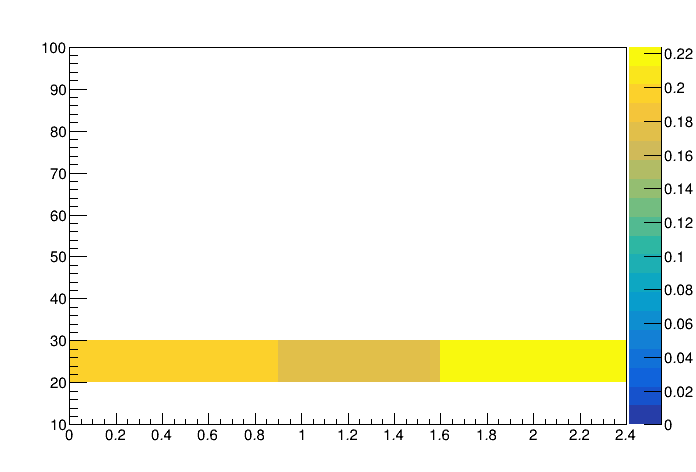

In [11]:
fakerate_central.SetStats(0)
c = ROOT.TCanvas()
c.cd()
fakerate_central.Draw("colz")
c.Draw()

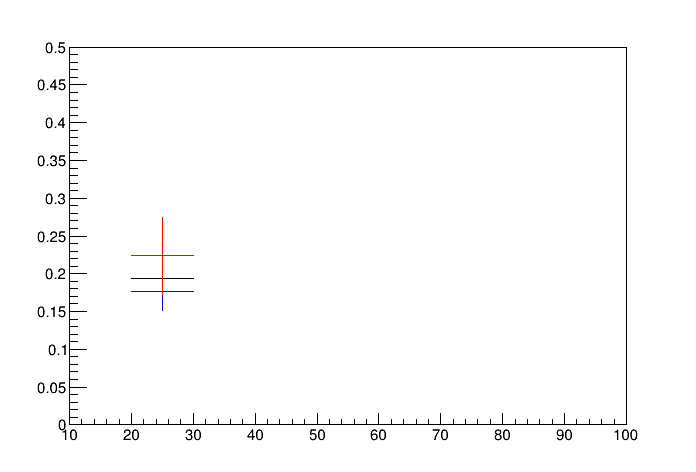

In [12]:
proj_y1 = fakerate_central.ProjectionY("y1", 1, 1); proj_y1.SetLineColor(ROOT.kBlack)
proj_y2 = fakerate_central.ProjectionY("y2", 2, 2); proj_y2.SetLineColor(ROOT.kBlue)
proj_y3 = fakerate_central.ProjectionY("y3", 3, 3); proj_y3.SetLineColor(ROOT.kRed)

proj_y1.SetStats(0)
proj_y1.GetYaxis().SetRangeUser(0., 0.5)
c = ROOT.TCanvas()
c.cd()
proj_y1.Draw()
proj_y2.Draw("same")
proj_y3.Draw("same")
c.Draw()

In [17]:
# Prompt norm variation
data_loose, data_tight = get_data_hists("PromptNormUp")
prompt_loose, prompt_tight = get_prompt_hists("PromptNormUp")

nonprompt_loose = data_loose.Clone("nonprompt_loose")
nonprompt_loose.Add(prompt_loose, -1)

nonprompt_tight = data_tight.Clone("nonprompt_tight")
nonprompt_tight.Add(prompt_tight, -1)

fakerate_promptnormup = nonprompt_tight.Clone("fakerate_promptnormup")
fakerate_promptnormup.Divide(nonprompt_loose)

# Prompt norm variation
data_loose, data_tight = get_data_hists("PromptNormDown")
prompt_loose, prompt_tight = get_prompt_hists("PromptNormDown")

nonprompt_loose = data_loose.Clone("nonprompt_loose")
nonprompt_loose.Add(prompt_loose, -1)

nonprompt_tight = data_tight.Clone("nonprompt_tight")
nonprompt_tight.Add(prompt_tight, -1)

fakerate_promptnormdown = nonprompt_tight.Clone("fakerate_promptnormdown")
fakerate_promptnormdown.Divide(nonprompt_loose)

True

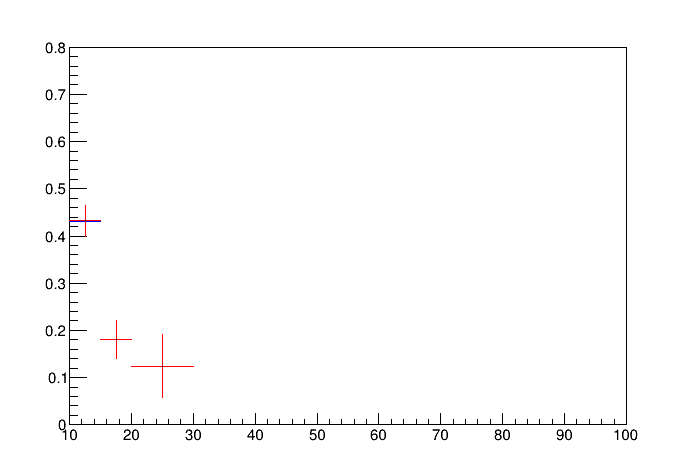

In [24]:
proj_y1 = fakerate_central.ProjectionY("y1", 3, 3); proj_y1.SetLineColor(ROOT.kBlack)
proj_y2 = fakerate_promptnormup.ProjectionY("y2", 3, 3); proj_y2.SetLineColor(ROOT.kBlue)
proj_y3 = fakerate_promptnormdown.ProjectionY("y3", 3, 3); proj_y3.SetLineColor(ROOT.kRed)

proj_y1.SetStats(0)
proj_y1.GetYaxis().SetRangeUser(0., 0.8)
c = ROOT.TCanvas()
c.cd()
proj_y1.Draw()
proj_y2.Draw("same")
proj_y3.Draw("same")
c.Draw()